Text(0.5,1,u'Initial Temperature (K) and Pressure (Pa) Perturbations')

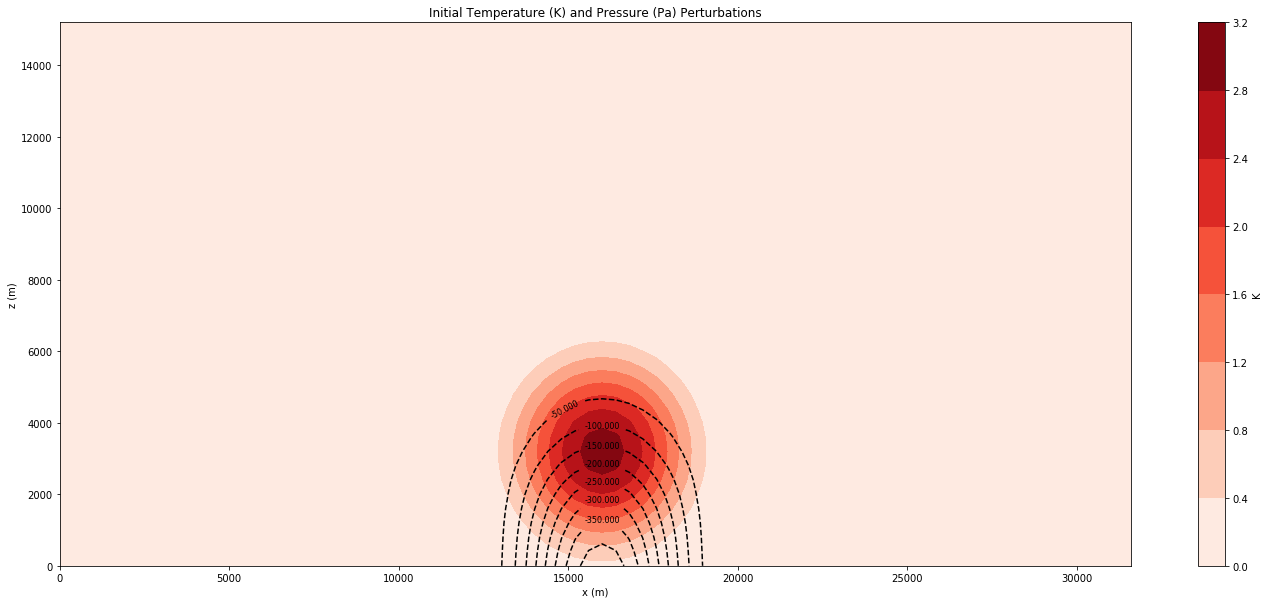

In [11]:
import numpy as np

nx = 83
nz=42

dx=400.0
dz=400.0
cp=1004.0
trigpi = 4.0*np.arctan(1.0)
rd=287.0
cv=cp-rd
rcpd= rd/cp
p0=100000.0
psurf=96500.0
grav=9.81
pott = 343.0
Ttr=213.0
Lv=2.5*(10**6)
radx=4000
radz=4000
zcnt=3000
delt=3
pisfc=(psurf/p0)**rcpd
y=np.empty([nz])
x=np.empty([nx])
for k in range(1,nz):
    y[k]=(k*dz-dz)
for i in range(1,nx):
    x[i]=(i*dx-dx)

#Base State Vectors

tb= np.empty([nz])
qb=np.empty([nz])
pb=np.empty([nz])
pib=np.empty([nz])
rhou=np.empty([nz])
rhow=np.empty([nz])
ub=np.empty([nz])

#prognostic arrays

thp=np.empty([nx,nz])
th=np.empty([nx,nz])
thm=np.empty([nx,nz])
wp=np.empty([nx,nz])
w=np.empty([nx,nz])
wm=np.empty([nx,nz])
up=np.empty([nx,nz])
u=np.empty([nx,nz])
um=np.empty([nx,nz])
pip=np.empty([nx,nz])
pi=np.empty([nx,nz])
pim=np.empty([nx,nz])
PPRT=np.empty([nx,nz])

for i in range(0,nz):
    tb[i]=300.0
    qb[i]=0.0
    ub[i]=0.0
potv=tb*(1.0+(.61*(qb)))

pib[1]=pisfc-((grav*.5*dz)/(cp*potv[1]))

for i in range(2, nz):
    potvavg=0.5*(potv[i]+potv[i-1])
    pib[i]=pib[i-1] - ((grav*dz)/(cp*potvavg))

rhou=(p0*pib**(cv/rd))/(rd*potv)
rhow[k] = 0.5*(rhou[k] + rhou[k-1])    

tb[0] = tb[1]
tb[nz-1] = tb[nz-2]
pib[0] = pib[1]
pib[nz-1] = pib[nz-2]
rhou[0] = rhou[1]
rhou[nz-1] = rhou[nz-2]
imid=(nx)/2
for i in range(1,nx-1):
    for k in range(1,nz-1):
        argz=((dz*(k-1.5)-zcnt)/radz)**2
        argx=(dx*(i-imid)/radx)**2
        rad=np.sqrt(argz+argx)
        if rad < 1:
         th[i,k]=0.5*delt*(np.cos(trigpi*rad)+1)
        else:
         th[i,k]=0.0
        thm[i,k]=th[i,k]


for i in range (1, nx-1):
    pi[i,nz-2] = 0.0
    pi[i,nz-1] = 0.0
    for k in range(nz-3, 0, -1):
        tup = th[i,k+1]/(tb[k+1]*tb[k+1])
        tdn = th[i][ k ]/(tb[k]*tb[k])
        pi[i,k] = pi[i,k+1]-0.5*(grav/cp)*(tup+tdn)*dz

    pi[i,0] = pi[i,1]

for i in range(0,nx):
    for k in range(0,nz):
        pim[i,k] = pi[i,k]
        PPRT[i,k] = pi[i,k]*cp*rhou[k]*tb[k]*(1.+0.61*qb[k])


levels=np.arange(-450,50,50)
import matplotlib.pyplot as plt
plt.figure(figsize=(24,10))
plt.clf()
plt.contourf(x[1:nx-2],y[1:nz-2],np.transpose(th[1:nx-2,1:nz-2]),cmap='Reds')
plt.colorbar(label='K')
CS=plt.contour(x[1:nx-2],y[1:nz-2],np.transpose(PPRT[1:nx-2,1:nz-2]),colors='k',levels=levels)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.clabel(CS,fontsize=8, inline=1)
plt.title('Initial Temperature (K) and Pressure (Pa) Perturbations')
#plt.savefig('perturbations.png',dpi=150)


In [12]:
print(pi)

[[7.69144955e-316 7.51336853e-316 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]
